---

### KEY NOTES

---

1. **FEATURE SELECTION**

Feature selection is usually done either before training the model or as part of the model training pipeline.

---
2. **FEATURE IMPORTANCE**

The goal of feature importance is to rank and quantify the feature’s contribution to the model predictions and/or model performance. 

---

---

Importing Libraries

---

In [63]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import ta
from fredapi import Fred
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


---

Mlflow Configuration

---

In [ ]:
import mlflow
from mlflow.entities import ViewType
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = ""
SET_EXPERIMENT = "INFO7374_team_nvdia"
EXPERIMENT_ID = "5"


---

Read Nvidia_Feature_Mart.csv and load the dataframe

---

In [71]:
# Read the CSV file and set the 'Unnamed: 0' column as the index
nvidia_original_df = pd.read_csv('./Nvidia_Feature_Mart.csv', index_col='Unnamed: 0')

# Rename the index column to 'Date'
nvidia_original_df.index.name = 'Date'

# Display the first few rows of the DataFrame
nvidia_original_df.head()


,Open,High,Low,Close,Adj Close,Volume,Returns,Daily_Return,Typical_Price,Typical_Price_Return,...,Mkt-RF,SMB,HML,RF,SP500,DEXJPUS,DEXUSEU,CBBTCUSD,ADS_Index,ADS_Index.1
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-18,61.465000,61.852501,59.272499,59.882500,59.357975,52402000.0,-0.874767,-0.014630,60.335833,-1.370346,...,-1.54,-0.54,0.42,0.008,2768.78,112.11,1.1494,6394.96,-0.479940,-0.479940
2018-10-19,60.439999,60.637501,56.924999,57.292500,56.790646,61360800.0,-2.567329,-0.044215,58.285000,-3.458141,...,-0.25,-1.33,0.71,0.008,2767.78,112.52,1.1513,6382.99,-0.479066,-0.479066
2018-10-22,57.820000,58.830002,56.767502,57.805000,57.298668,36884400.0,0.508022,0.008906,57.800835,-0.834155,...,-0.38,0.48,-1.25,0.008,2755.88,112.78,1.1467,6407.65,-0.472025,-0.472025
2018-10-23,55.107498,56.047501,54.177502,55.264999,54.780907,62643600.0,-2.517761,-0.044936,55.163334,-4.670472,...,-0.62,-0.10,-0.41,0.008,2740.69,112.12,1.1480,6395.14,-0.468786,-0.468786
2018-10-24,54.877499,55.347500,49.712502,49.852501,49.415833,88428800.0,-5.365074,-0.103071,51.637501,-6.605032,...,-3.33,-0.93,0.77,0.008,2656.10,112.58,1.1389,6415.98,-0.465173,-0.465173


---

 Data Preprocessing for NVIDIA Stock

 ---

In [72]:
# Convert the index of the DataFrame to datetime format
nvidia_original_df.index = pd.to_datetime(nvidia_original_df.index)

# Filter the DataFrame to include only data from January 1, 2022, onwards
nvidia_df = nvidia_original_df[nvidia_original_df.index >= pd.to_datetime("2022-01-01")]

display(nvidia_df)

,Open,High,Low,Close,Adj Close,Volume,Returns,Daily_Return,Typical_Price,Typical_Price_Return,...,Mkt-RF,SMB,HML,RF,SP500,DEXJPUS,DEXUSEU,CBBTCUSD,ADS_Index,ADS_Index.1
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.795105,39154700.0,7.090240,0.023854,302.056661,2.057056,...,0.73,0.34,0.78,0.000,4796.56,115.27,1.1290,46519.76,-0.392577,-0.392577
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.496552,52715400.0,-8.298553,-0.027976,293.689992,-2.808986,...,-0.29,-0.82,3.62,0.000,4793.54,116.12,1.1296,45889.40,-0.403031,-0.403031
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.659821,49806400.0,-16.836731,-0.059285,281.843333,-4.117340,...,-2.28,-1.46,2.60,0.000,4700.58,115.91,1.1335,43422.85,-0.411485,-0.411485
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.391907,45418600.0,5.732086,0.020581,278.936666,-1.036661,...,0.00,0.20,1.75,0.000,4696.05,115.78,1.1307,43133.33,-0.417943,-0.417943
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.094757,40993900.0,-9.297150,-0.033598,275.753337,-1.147799,...,-0.48,-1.32,2.02,0.000,4677.03,115.61,1.1358,41656.16,-0.422405,-0.422405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,433.980011,436.500000,415.549988,417.790009,417.753265,39837900.0,-18.838348,-0.044107,423.279999,-2.386560,...,-1.58,-0.30,0.84,0.021,4186.77,149.94,1.0583,34489.91,-0.638569,-0.638569
2023-10-26,418.529999,422.559998,398.799988,403.260010,403.224548,54100100.0,-14.528717,-0.035397,408.206665,-3.626032,...,-1.15,0.85,1.66,0.021,4137.23,150.44,1.0532,34140.00,-0.626157,-0.626157
2023-10-27,411.299988,412.059998,400.149994,405.000000,404.964386,41678400.0,1.739838,0.004306,405.736664,-0.606924,...,-0.53,-0.35,-0.57,0.021,4117.37,149.60,1.0592,33905.16,-0.611514,-0.611514


---

Drop unnecessary columns (e.g., features derived from "Close")

---


In [75]:
# Drop specified columns
columns_to_drop = ['Open', 'High', 'Low','Adj Close', 'Volume','Returns', 'Daily_Return', 'Typical_Price']
nvidia_df_final=nvidia_df.drop(columns_to_drop, axis=1)

In [76]:
nvidia_df_final.head()

,Close,Typical_Price_Return,Volume_Log,Volume_Differencing,Volume_Differencing_10,Volumne_Percent_Change,MA_5,Volumne_MA_200,Close_EMA_50,Momentum_AwesomeOscillatorIndicator,...,Mkt-RF,SMB,HML,RF,SP500,DEXJPUS,DEXUSEU,CBBTCUSD,ADS_Index,ADS_Index.1
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,301.209991,2.057056,17.483031,12501700.0,-32221100.0,0.469054,17.359752,0.076706,0.050657,-4.145442,...,0.73,0.34,0.78,0.0,4796.56,115.27,1.1290,46519.76,-0.392577,-0.392577
2022-01-04,292.899994,-2.808986,17.780418,13560700.0,6530700.0,0.346336,17.419504,0.445052,0.020803,-6.512501,...,-0.29,-0.82,3.62,0.0,4793.54,116.12,1.1296,45889.40,-0.403031,-0.403031
2022-01-05,276.040009,-4.117340,17.723654,-2909000.0,-2632100.0,-0.055183,17.500462,0.360164,-0.036522,-9.014709,...,-2.28,-1.46,2.60,0.0,4700.58,115.91,1.1335,43422.85,-0.411485,-0.411485
2022-01-06,281.779999,-1.036661,17.631432,-4387800.0,5900200.0,-0.088097,17.570871,0.236819,-0.015851,-12.949003,...,0.00,0.20,1.75,0.0,4696.05,115.78,1.1307,43133.33,-0.417943,-0.417943
2022-01-07,272.470001,-1.147799,17.528934,-4424700.0,6691700.0,-0.097420,17.635809,0.114585,-0.046559,-15.566001,...,-0.48,-1.32,2.02,0.0,4677.03,115.61,1.1358,41656.16,-0.422405,-0.422405


---

Define the target variable

---

In [77]:
# Define the target variable
target_variable = "Close"

---
Train and Test Data

---

In [96]:
# Split the data into features and target
X = nvidia_df_final.drop(target_variable, axis=1)
y = nvidia_df_final[target_variable]

In [97]:
# Define the split date for training and testing data
split_date = pd.to_datetime("2023-07-31")

X_train = X[X.index <= split_date]
y_train = y[y.index <= split_date]

X_test = X[X.index > split_date]
y_test = y[y.index > split_date]

print(f"Number of rows in df_train: {len(X_train)}")
print(f"Number of rows in df_test: {len(X_test)}")

Number of rows in df_train: 393
Number of rows in df_test: 64


---
Model - RandomForestRegressor

---


---

Training the model : X_train, y_train

---

In [99]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

---
Testing the model: X_test, y_test

---

In [100]:
# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print(f"Number of predictions: {len(y_pred)}")

Number of predictions: 64


In [101]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on the test set: {mae:.2f}")

Mean Absolute Error on the test set: 31.34


---
Feature Importance

---

In [102]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

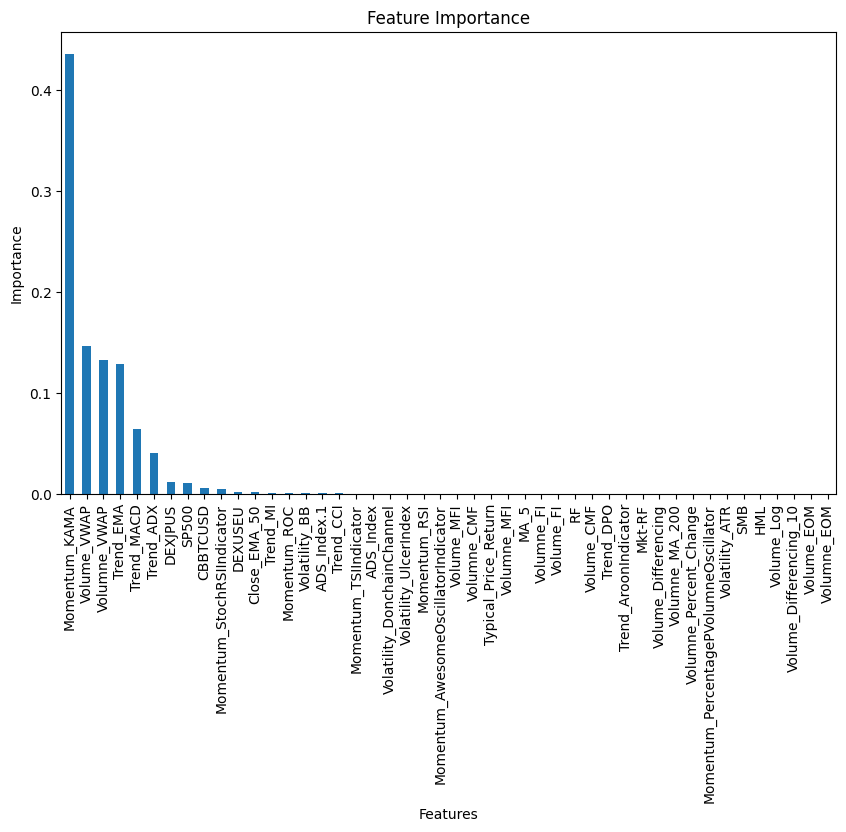

In [103]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [104]:
# Select top features
top_features = feature_importance.head(10).index.tolist()

In [105]:
# Retrain the model with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [106]:
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [107]:
# Evaluate the model on the test set with selected features
y_pred_selected = rf_model_selected.predict(X_test_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)
print(f"Mean Absolute Error with selected features: {mae_selected:.2f}")


Mean Absolute Error with selected features: 17.34
